# Accident Analysis Report with Machine Learning & NLP

This notebook combines **data analysis, visualization, machine learning modeling, and natural language processing (NLP)** to analyze industrial accident data and uncover insights that can help reduce tragic accidents.



## Step 1: Load the Datasets
We begin by loading both the **structured dataset** (numerical/categorical accident records) and the **text dataset** (accident descriptions). These two sources will be used for structured ML modeling and NLP-based analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# NLP


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Explainability


In [4]:
import shap


In [5]:
df = pd.read_csv("/content/IHMStefanini_industrial_safety_and_health_database.csv")
df_text = pd.read_csv("/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")


In [6]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (439, 9)


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


**Conclusion:** We now have two datasets ready – one structured and one textual.


## Step 2: Basic Information & Data Quality Check
We explore dataset structure, missing values, and feature types to guide preprocessing.


In [7]:
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      439 non-null    object
 1   Countries                 439 non-null    object
 2   Local                     439 non-null    object
 3   Industry Sector           439 non-null    object
 4   Accident Level            439 non-null    object
 5   Potential Accident Level  439 non-null    object
 6   Genre                     439 non-null    object
 7   Employee ou Terceiro      439 non-null    object
 8   Risco Critico             439 non-null    object
dtypes: object(9)
memory usage: 31.0+ KB
None

Missing Values:
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee ou Te

**Conclusion:** This check ensures no major missing values and helps plan encoding/scaling steps.


## Step 3: Univariate Analysis
We look at each feature’s distribution individually.


In [ ]:
if "Data" in df.columns:
    df["Data"] = pd.to_datetime(df["Data"], errors="coerce")


# Plot categorical variables (top 10 categories)


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


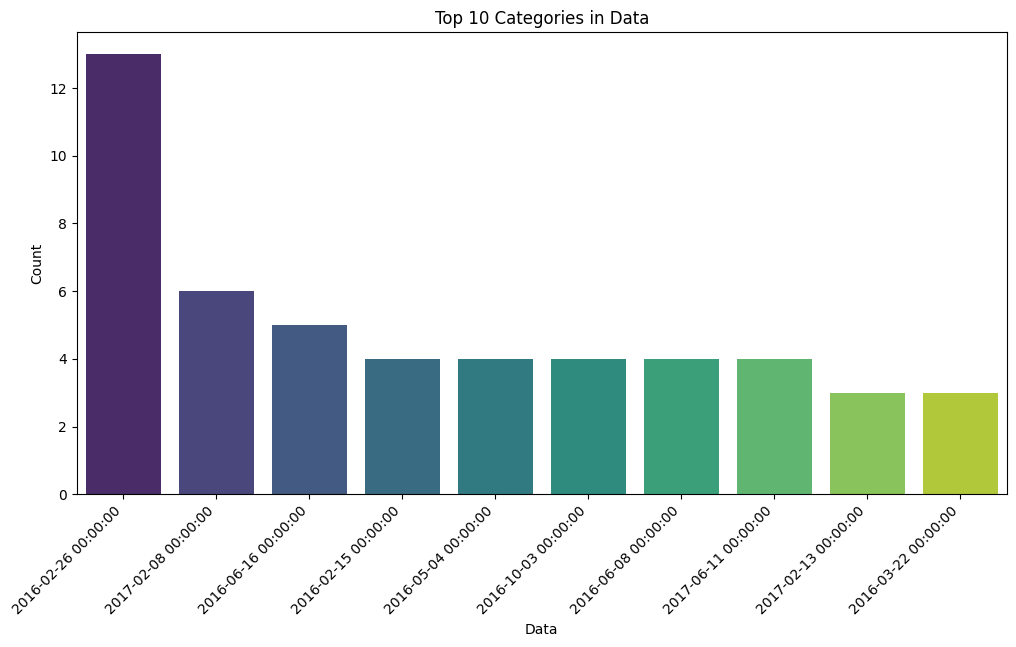

Conclusion: Most frequent category in Data is '2016-02-26 00:00:00' with 13 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


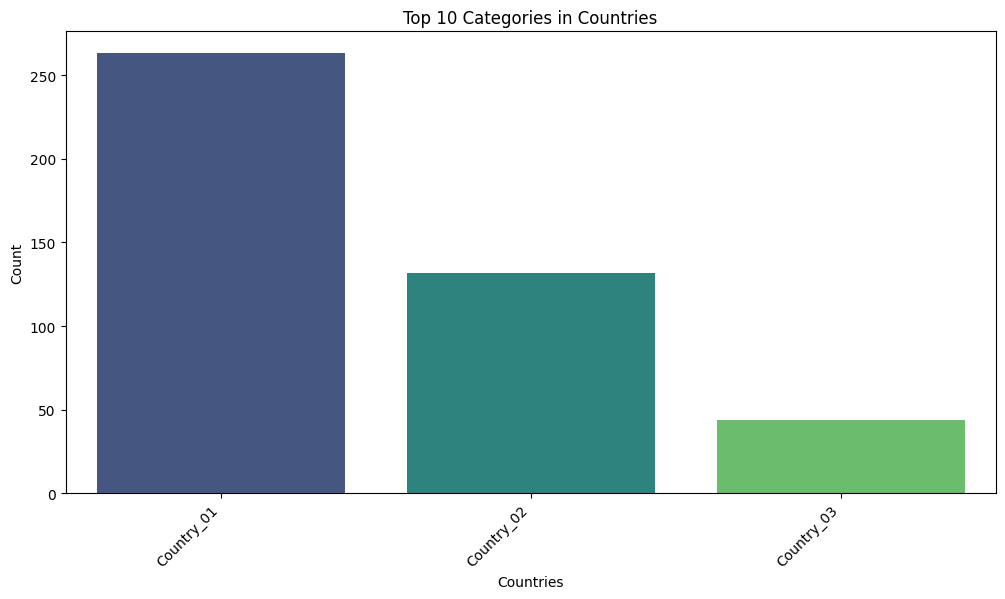

Conclusion: Most frequent category in Countries is 'Country_01' with 263 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


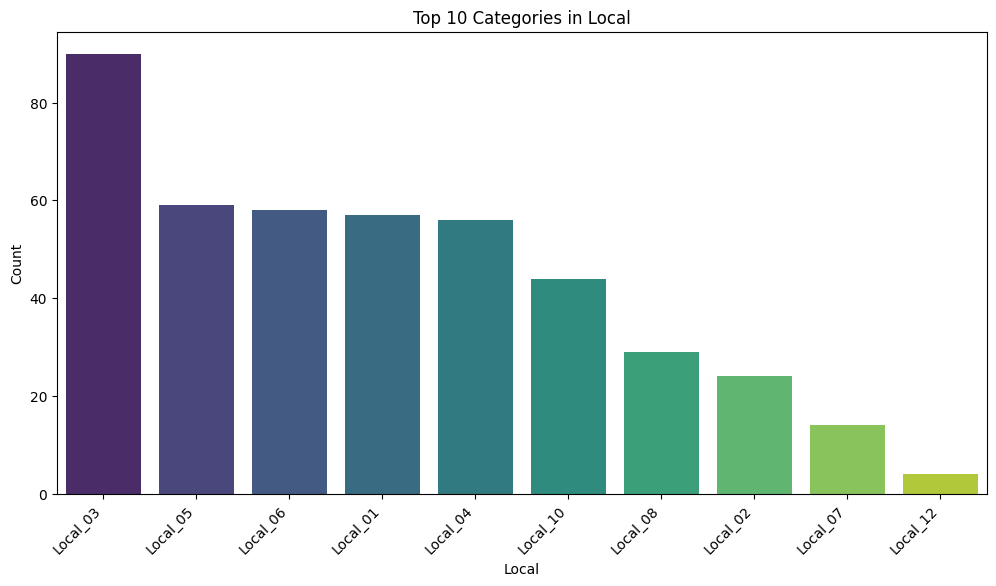

Conclusion: Most frequent category in Local is 'Local_03' with 90 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


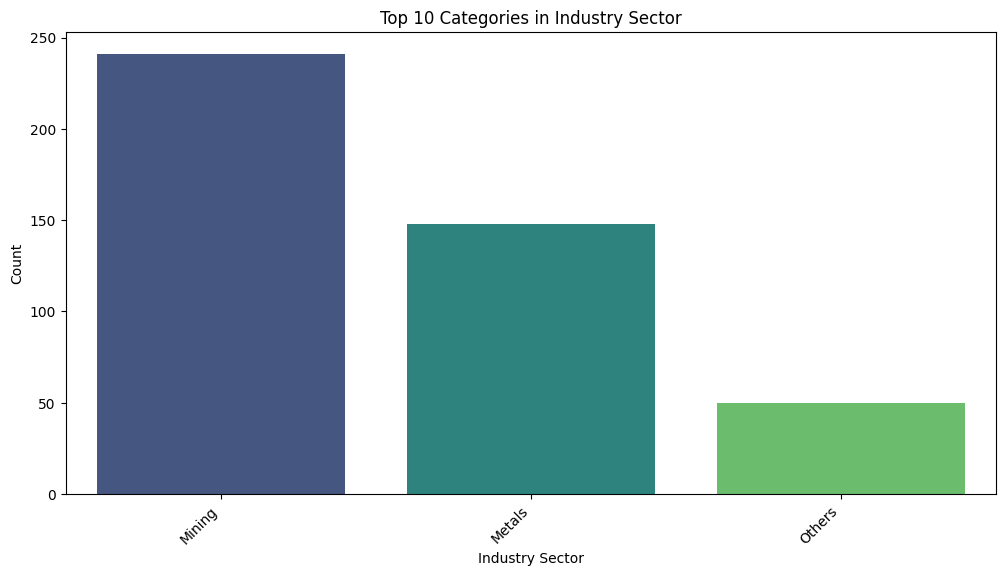

Conclusion: Most frequent category in Industry Sector is 'Mining' with 241 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


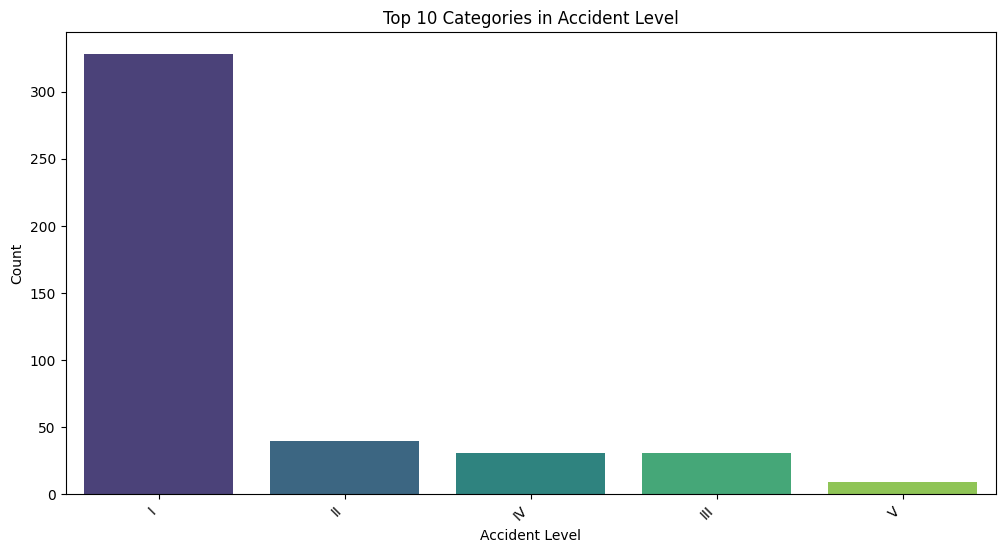

Conclusion: Most frequent category in Accident Level is 'I' with 328 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


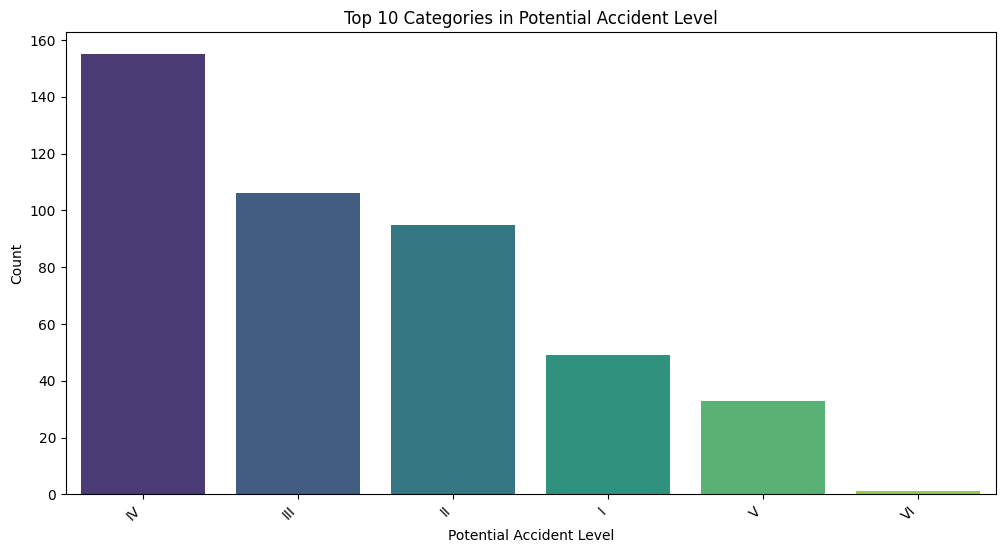

Conclusion: Most frequent category in Potential Accident Level is 'IV' with 155 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


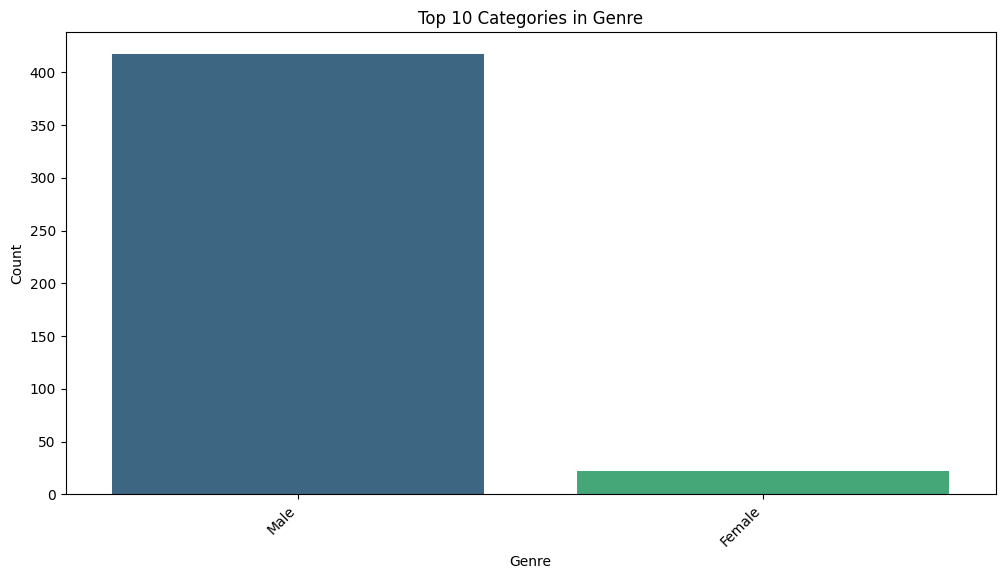

Conclusion: Most frequent category in Genre is 'Male' with 417 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


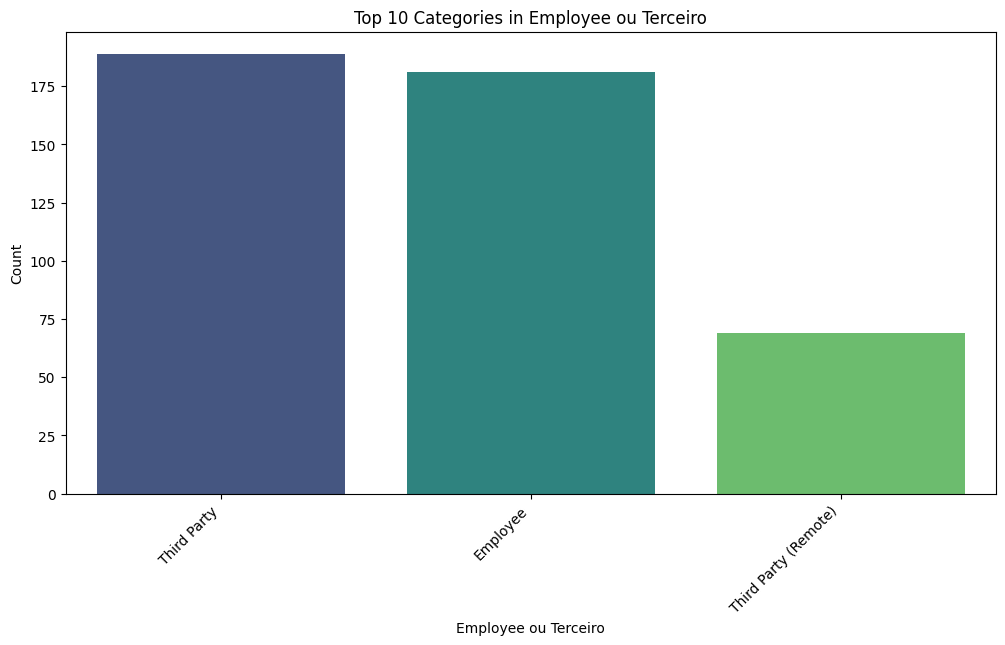

Conclusion: Most frequent category in Employee ou Terceiro is 'Third Party' with 189 records


/tmp/ipython-input-1862349394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


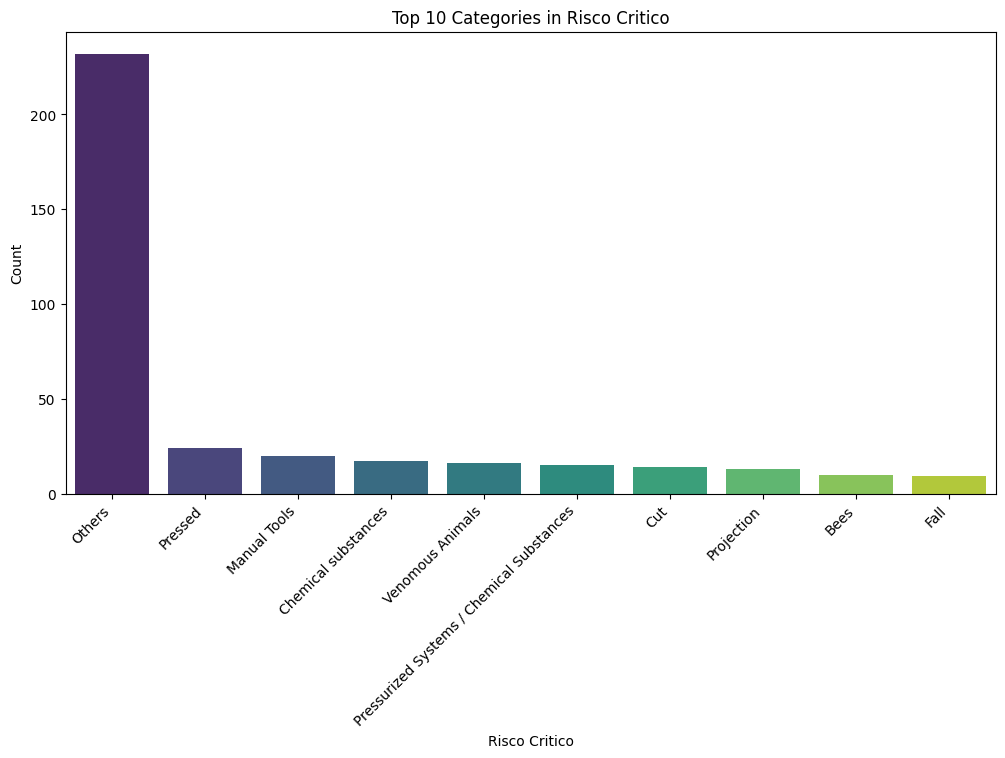

Conclusion: Most frequent category in Risco Critico is 'Others' with 232 records


In [9]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12,6))
    top_categories = df[col].value_counts().nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
    plt.title(f"Top 10 Categories in {col}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.show()
    print(f"Conclusion: Most frequent category in {col} is '{top_categories.idxmax()}' with {top_categories.max()} records")


# Analyze accident distribution by Year and Month (from 'Data' column)


After datetime conversion, non-null dates: 180


/tmp/ipython-input-1969661040.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Data"].dt.year.astype(int)
/tmp/ipython-input-1969661040.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Data"].dt.month.astype(int)
/tmp/ipython-input-1969661040.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

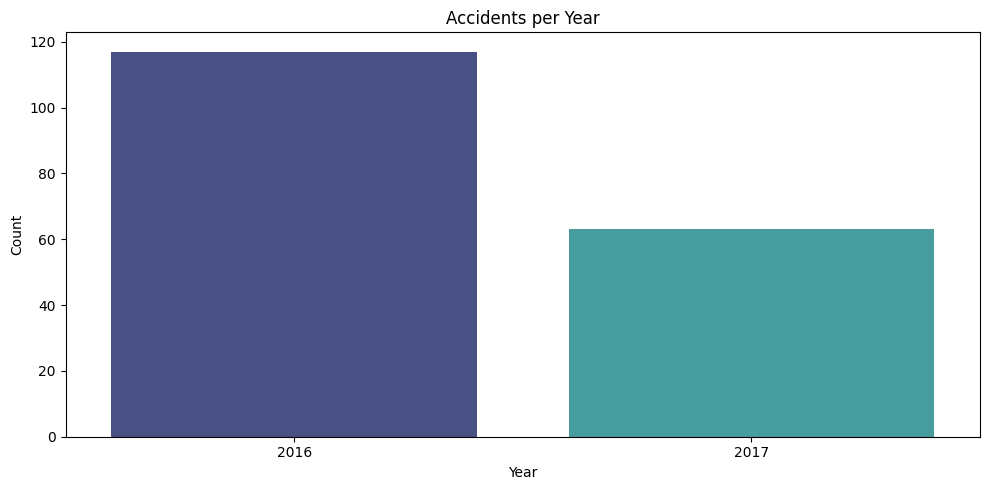

/tmp/ipython-input-1969661040.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, palette="magma")


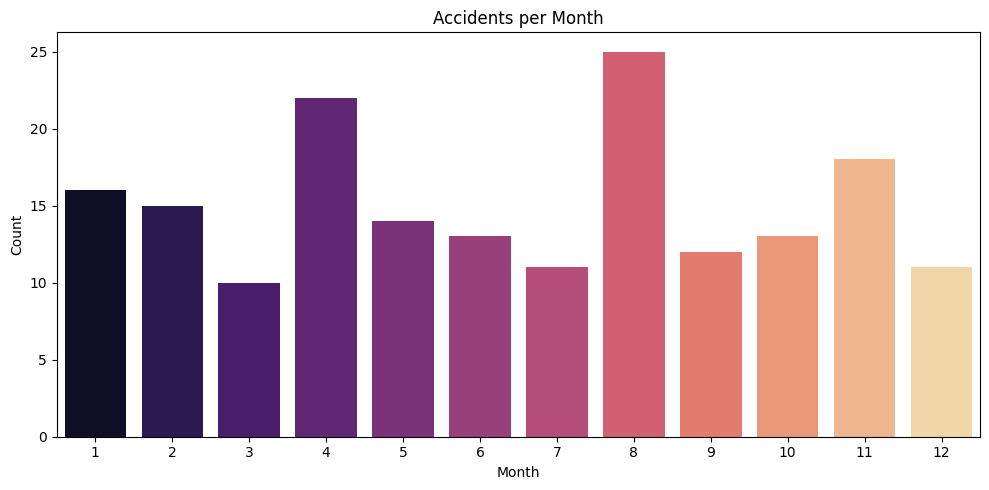

/tmp/ipython-input-1969661040.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


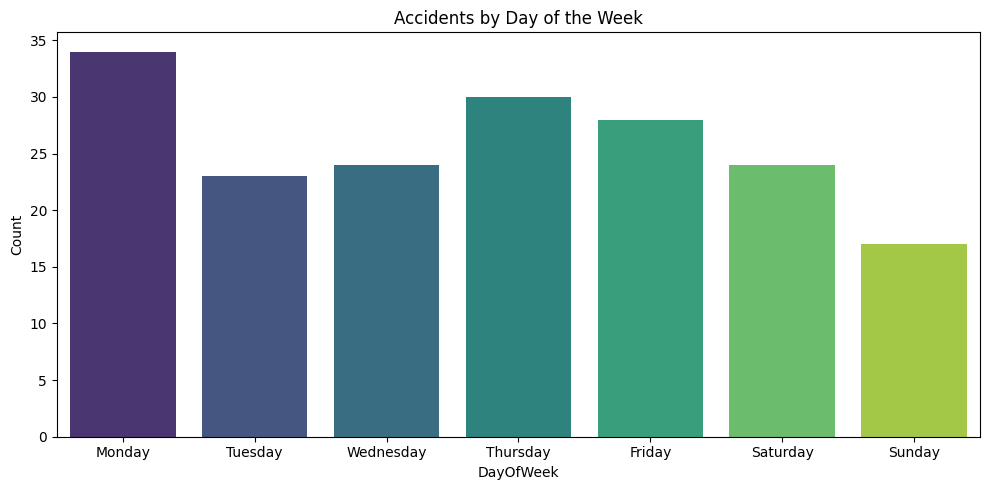

In [15]:
# Analyze accident distribution by Year, Month, Day of Week

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if "Data" in df.columns:
    df["Data"] = pd.to_datetime(df["Data"], errors="coerce", dayfirst=True)
    print("After datetime conversion, non-null dates:", df["Data"].notnull().sum())

df = df.dropna(subset=["Data"])

if "Data" in df.columns and pd.api.types.is_datetime64_any_dtype(df["Data"]):
    df["Year"] = df["Data"].dt.year.astype(int)
    df["Month"] = df["Data"].dt.month.astype(int)
    df["DayOfWeek"] = df["Data"].dt.day_name()

    #  Accidents per Year
    if df["Year"].nunique() > 0:
        plt.figure(figsize=(10,5))
        sns.countplot(x="Year", data=df, palette="mako")
        plt.title("Accidents per Year")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    #  Accidents per Month
    if df["Month"].nunique() > 0:
        plt.figure(figsize=(10,5))
        sns.countplot(x="Month", data=df, palette="magma")
        plt.title("Accidents per Month")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    #  Accidents by Day of the Week
    if df["DayOfWeek"].nunique() > 0:
        plt.figure(figsize=(10,5))
        sns.countplot(
            x="DayOfWeek",
            data=df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            palette="viridis"
        )
        plt.title("Accidents by Day of the Week")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
else:
    print("The 'Data' column could not be converted to datetime. Please check the dataset format.")


# Step 4: Multivariate Analysis


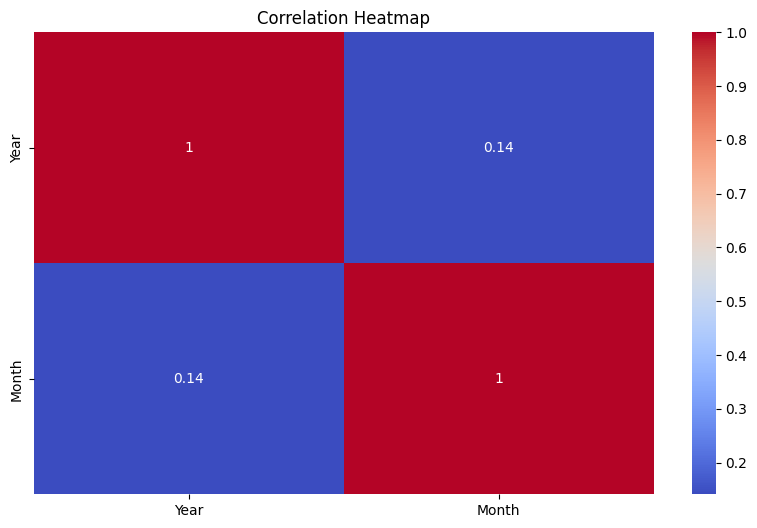

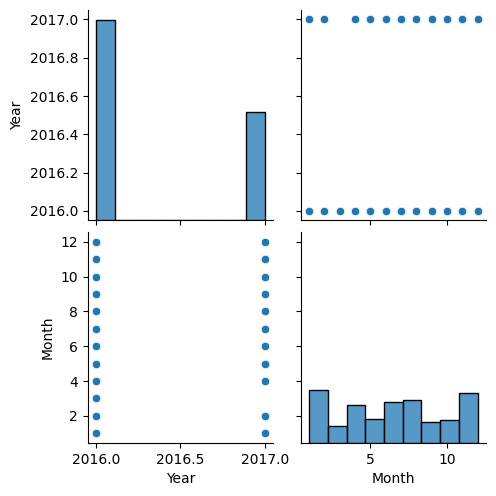

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df.select_dtypes(include=[np.number]).iloc[:,:4])
plt.show()

# Step 5: Preprocessing


In [18]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Drop datetime columns (Data, Year, Month, DayOfWeek if still present)
df = df.drop(columns=[col for col in df.columns if pd.api.types.is_datetime64_any_dtype(df[col])], errors='ignore')

X = df.drop("Accident Level", axis=1)
y = df["Accident Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Training & Evaluation


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.83        36
   macro avg       0.22      0.23      0.23        36
weighted avg       0.78      0.83      0.81        36

Confusion Matrix:
 [[30  1  1  0]
 [ 1  0  0  0]
 [ 1  0  0  0]
 [ 2  0  0  0]]


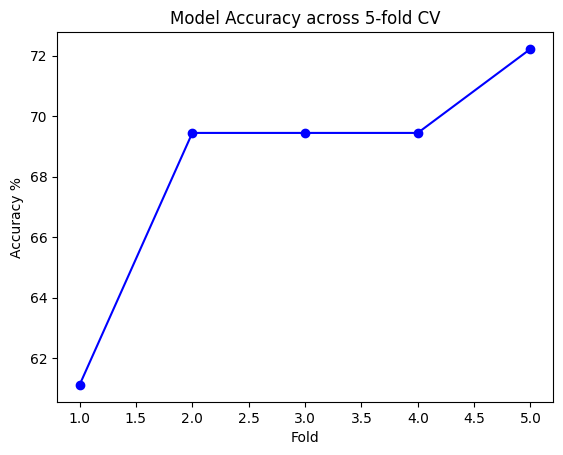

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracies = cross_val_score(model, X, y, cv=5)
plt.plot(range(1,6), accuracies*100, marker='o', color='b')
plt.title("Model Accuracy across 5-fold CV")
plt.xlabel("Fold")
plt.ylabel("Accuracy %")
plt.show()

# Step 7: Feature Importance


/tmp/ipython-input-3842375143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


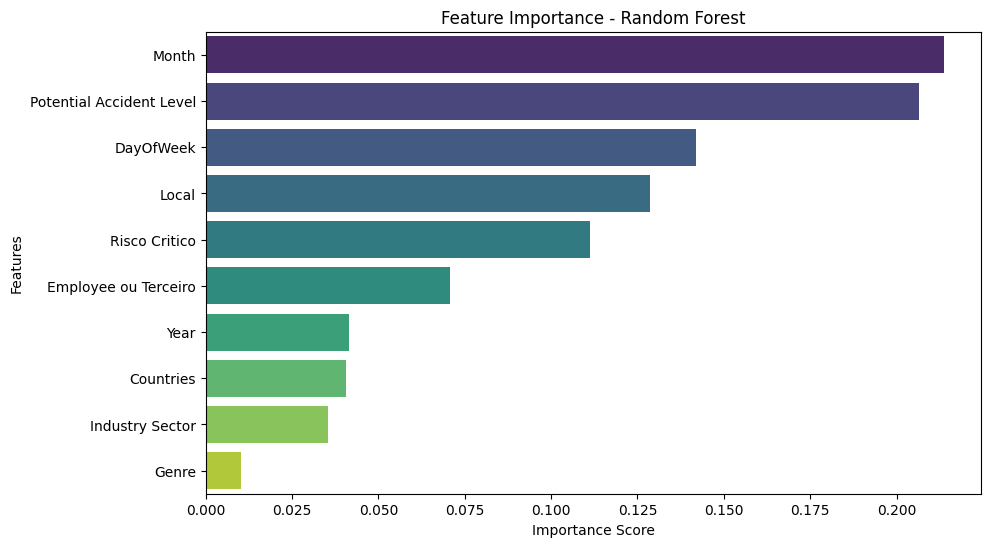

In [20]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Step 8: SHAP Analysis


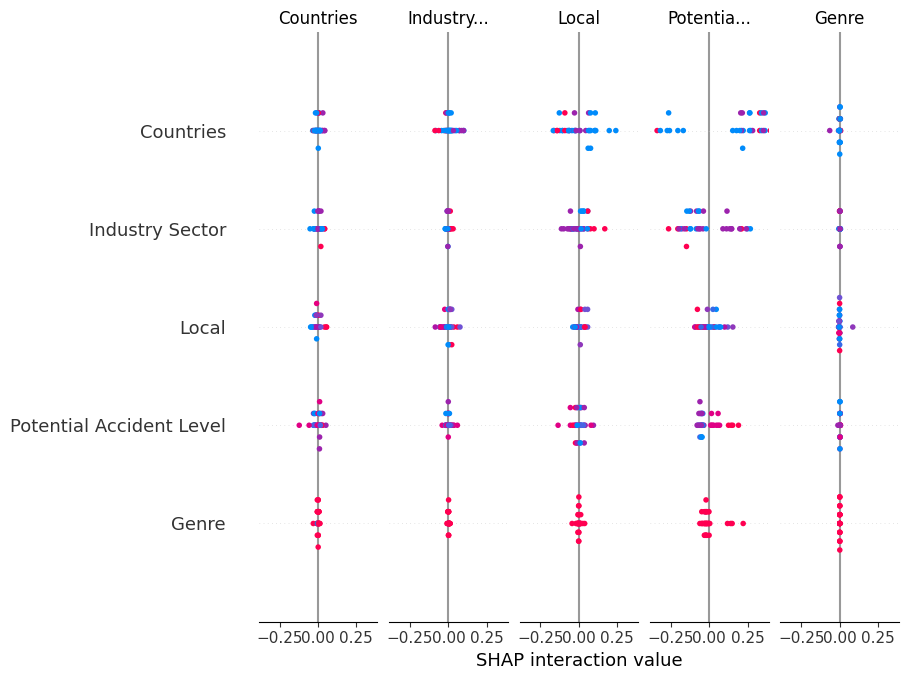

In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)



# Step 9: NLP Analysis on Accident Descriptions


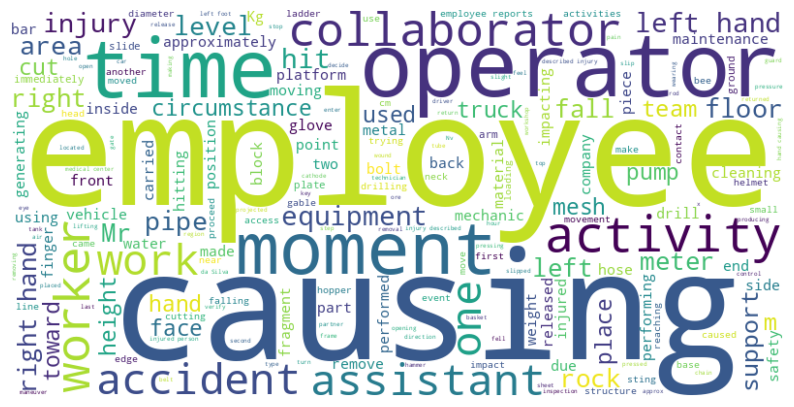


NLP Model Accuracy: 80.0 %


In [22]:
# Word Cloud
text = " ".join(df_text["Description"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# TF-IDF + Classification
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = vectorizer.fit_transform(df_text["Description"].astype(str))
y_text = le.fit_transform(df_text["Accident Level"])

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

model_text = RandomForestClassifier(n_estimators=100, random_state=42)
model_text.fit(X_train_t, y_train_t)
y_pred_t = model_text.predict(X_test_t)

print("\nNLP Model Accuracy:", accuracy_score(y_test_t, y_pred_t)*100, "%")

#Key Takeaways:

*  Both structured data and textual narratives are valuable in understanding
accident severity.
*   Machine learning and NLP methods complement each other in improving prediction accuracy and interpretability.

*   The models developed here can assist industrial safety teams in:
*   Identifying risk factors early,


*  Improving reporting mechanisms, and
*  Designing targeted safety interventions.



*  This approach lays the groundwork for a data-driven safety intelligence system that can significantly reduce accident rates and severity in industrial environments.











